In [144]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Analysis 1:  All Students

In [145]:
#read result.  This file contains the results of the SQL query defined by Anisa and Kyle
attendance = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
attendance = attendance[['SchoolID','School','SchoolType','No_of_Program','FrRedLnch_PercentEligible','PercentofStudentsNotChronicallyAbsent','Enrollment']]
attendance

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
1,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
3,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
4,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
5,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
6,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
7,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
8,4555,Academy for Character Education,H,1,NaN,NaN,117.0
9,4555,Academy for Character Education,H,1,NaN,NaN,117.0


In [146]:
#We are interested in all school types for this analysis (SchoolType == E, M, H)
# Drop duplicates 
attendance = attendance.drop_duplicates()
attendance

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
5,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
8,4555,Academy for Character Education,H,1,NaN,NaN,117.0
11,4440,Academy of Arts and Academics,H,1,55.68,68.7,352.0
14,4540,Academy of International Studies (at Woodburn),H,1,76.95,71.1,308.0
17,27,Adams Elementary School,E,4,21.43,93.0,378.0
20,503,Adams Elementary School,E,7,40.54,87.2,444.0
23,498,Adel Elementary School,E,1,NaN,95.0,8.0
26,707,Adrian Elementary School,E,1,67.20,88.9,186.0


In [147]:
# remove records with missing data
attendance = attendance.dropna()
attendance

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
5,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
11,4440,Academy of Arts and Academics,H,1,55.68,68.7,352.0
14,4540,Academy of International Studies (at Woodburn),H,1,76.95,71.1,308.0
17,27,Adams Elementary School,E,4,21.43,93.0,378.0
20,503,Adams Elementary School,E,7,40.54,87.2,444.0
26,707,Adrian Elementary School,E,1,67.20,88.9,186.0
32,1353,Agnes Stewart Middle School,M,2,72.46,82.0,570.0
35,694,Aiken Elementary School,E,2,80.80,89.5,276.0


## Plot:  Number of Programs (No_of_Program - xaxis) by PercentofStudentsNotChronicallyAbsent (yaxis)

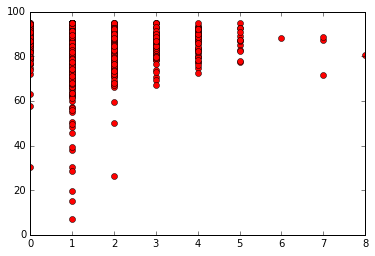

In [148]:
plt.plot(attendance['No_of_Program'], attendance['PercentofStudentsNotChronicallyAbsent'], 'ro')
plt.show()


### This shows a positive relationship between Number of programs and attendance (more programs means better attendance)

## Plot:  Poverty (FrRedLnch_PercentEligible - xaxis) by PercentofStudentsNotChronicallyAbsent

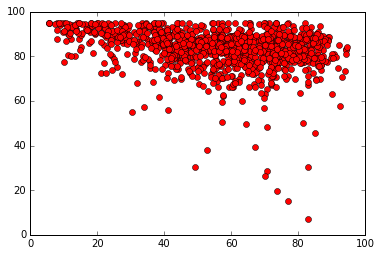

In [149]:
plt.plot(attendance['FrRedLnch_PercentEligible'], attendance['PercentofStudentsNotChronicallyAbsent'],'ro')
plt.show()


### This plot suggests a negative relationship between poverty and attendance (more poverty means more students chronically absent)

## Regression:  Predicting Absence with Povery and Number of Programs

In [150]:
res = ols("PercentofStudentsNotChronicallyAbsent ~ No_of_Program + FrRedLnch_PercentEligible", data=attendance).fit()
print(res.summary())


                                      OLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.112
Model:                                               OLS   Adj. R-squared:                  0.110
Method:                                    Least Squares   F-statistic:                     67.80
Date:                                   Fri, 20 May 2016   Prob (F-statistic):           1.87e-28
Time:                                           08:32:32   Log-Likelihood:                -3866.3
No. Observations:                                   1078   AIC:                             7739.
Df Residuals:                                       1075   BIC:                             7754.
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

## Key Finding:  Number of programs (1-8) contributes positively to attendance (more programs means better attendance).  Coeficient of 1.4691 is statistically significant (P>|t| = 0.000)


## Number of Programs predicting attendance (with Poverty removed)

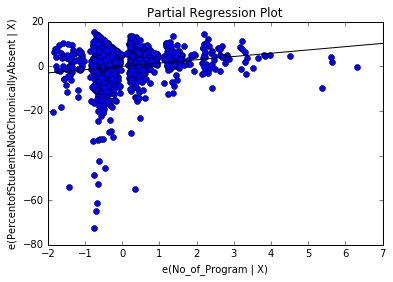

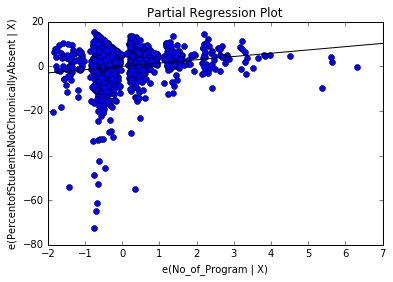

In [151]:
sm.graphics.plot_partregress("PercentofStudentsNotChronicallyAbsent", "No_of_Program", exog_others=["FrRedLnch_PercentEligible"], data=attendance, title_kwargs={}, obs_labels=False)

## Plot shows a positive best fit line between number of programs (No_of_Programs) predicting PercentofStudentsNotChronicallyAbsent (absenteeism)

# Analysis 2:  Elementary Schools

In [152]:
#read csv.  This file contains the results of the SQL query defined by Anisa and Kyle
attendance = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
attendance = attendance[['SchoolID','School','SchoolType','No_of_Program','FrRedLnch_PercentEligible','PercentofStudentsNotChronicallyAbsent','Enrollment']]

In [153]:
#We are only interested in elementary schools
elementary = attendance.query("SchoolType == 'E'").drop_duplicates()
# remove records with missing data
elementary = elementary.dropna()
elementary

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
0,813,A C Houghton Elementary School,E,1,76.17,76.6,298.0
2,822,Abernethy Elementary School,E,1,11.33,92.0,512.0
5,1350,Abraham Lincoln Elementary,E,2,41.73,89.7,496.0
17,27,Adams Elementary School,E,4,21.43,93.0,378.0
20,503,Adams Elementary School,E,7,40.54,87.2,444.0
26,707,Adrian Elementary School,E,1,67.20,88.9,186.0
35,694,Aiken Elementary School,E,2,80.80,89.5,276.0
38,823,Ainsworth Elementary School,E,5,5.67,95.0,582.0
44,692,Alameda Elementary School,E,2,86.00,90.9,407.0
47,824,Alameda Elementary School,E,3,7.82,94.9,767.0


## Plot:  Number of Programs (No_of_Program - xaxis) by PercentofStudentsNotChronicallyAbsent (yaxis)

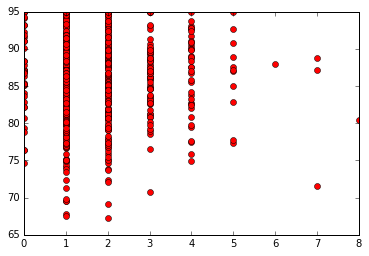

In [154]:
plt.plot(elementary['No_of_Program'], elementary['PercentofStudentsNotChronicallyAbsent'], 'ro')
plt.show()


### This shows that there is positive relationship between Number of programs and attendance (more programs means better attendance)

## Plot:  Poverty (FrRedLnch_PercentEligible - xaxis) by PercentofStudentsNotChronicallyAbsent

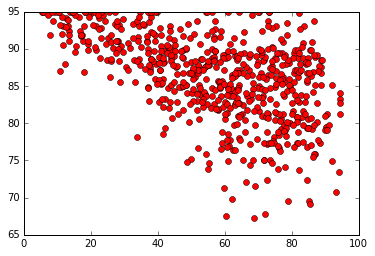

In [155]:
plt.plot(elementary['FrRedLnch_PercentEligible'], elementary['PercentofStudentsNotChronicallyAbsent'],'ro')
plt.show()


### This plot suggests a negative relationship between poverty and attendance (more poverty means more students chronically absent)

## Regression:  Predicting Absence with Povery and Number of Programs

In [156]:
res = ols("PercentofStudentsNotChronicallyAbsent ~ No_of_Program + FrRedLnch_PercentEligible", data=elementary).fit()
print(res.summary())


                                      OLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.281
Model:                                               OLS   Adj. R-squared:                  0.279
Method:                                    Least Squares   F-statistic:                     124.2
Date:                                   Fri, 20 May 2016   Prob (F-statistic):           2.93e-46
Time:                                           08:32:37   Log-Likelihood:                -1911.0
No. Observations:                                    639   AIC:                             3828.
Df Residuals:                                        636   BIC:                             3841.
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

# Key Finding:  Number of programs (1-8) contributes positively to attendance (more programs means better attendance).  Coeficient of 0.2962 is marginally statistically significant (P>|t| = 0.077)

## Plot of Number of Programs predicting with Poverty removed 

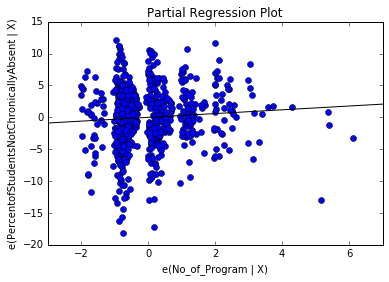

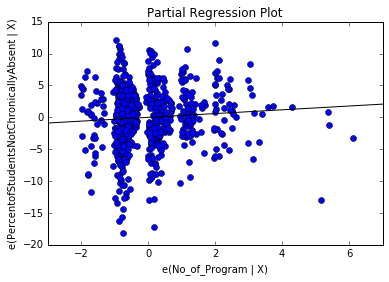

In [157]:
sm.graphics.plot_partregress("PercentofStudentsNotChronicallyAbsent", "No_of_Program", exog_others=["FrRedLnch_PercentEligible"], data=elementary, title_kwargs={}, obs_labels=False)

## These plots show a positive best fit line

# Analysis 3:  Middle Schools

In [158]:
#read csv.  This file contains the results of the SQL query defined by Anisa and Kyle
attendance = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
attendance = attendance[['SchoolID','School','SchoolType','No_of_Program','FrRedLnch_PercentEligible','PercentofStudentsNotChronicallyAbsent','Enrollment']]

In [159]:
#We are only interested in middle schools for this analysis
elementary = attendance.query("SchoolType == 'M'").drop_duplicates()
# remove records with missing data
elementary = elementary.dropna()
elementary

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
32,1353,Agnes Stewart Middle School,M,2,72.46,82.0,570.0
56,3530,Alder Creek Middle School,M,1,54.75,84.3,999.0
62,980,Alice Ott Middle School,M,2,74.12,91.8,711.0
95,1209,Amity Middle School,M,1,57.07,70.2,198.0
128,1039,Armand Larive Middle School,M,1,65.86,87.3,665.0
137,4554,Arts and Technology Academy at Jefferson,M,4,71.96,79.6,296.0
149,380,Ashland Middle School,M,1,42.16,78.6,574.0
157,144,Astoria Middle School,M,1,52.18,85.8,412.0
165,1287,Athey Creek Middle School,M,0,14.65,87.7,635.0
180,235,Azalea Middle School,M,1,62.94,80.9,367.0


## Plot:  Number of Programs (No_of_Program - xaxis) by PercentofStudentsNotChronicallyAbsent (yaxis)

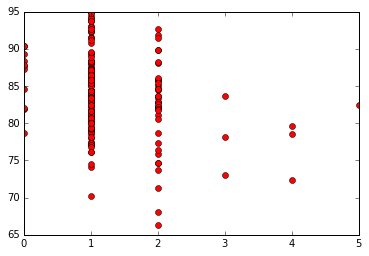

In [160]:
plt.plot(elementary['No_of_Program'], elementary['PercentofStudentsNotChronicallyAbsent'], 'ro')
plt.show()


### This shows that there is positive relationship between Number of programs and attendance (more programs means better attendance)

## Plot:  Poverty (FrRedLnch_PercentEligible - xaxis) by PercentofStudentsNotChronicallyAbsent

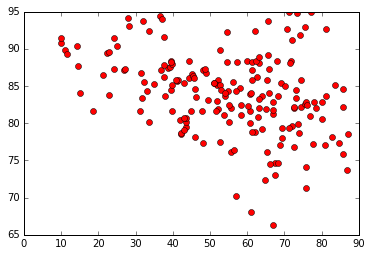

In [161]:
plt.plot(elementary['FrRedLnch_PercentEligible'], elementary['PercentofStudentsNotChronicallyAbsent'],'ro')
plt.show()


### This plot suggests a negative relationship between poverty and attendance (more poverty means more students chronically absent)

## Regression:  Predicting Absence with Povery and Number of Programs

In [162]:
res = ols("PercentofStudentsNotChronicallyAbsent ~ No_of_Program + FrRedLnch_PercentEligible", data=elementary).fit()
print(res.summary())


                                      OLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.146
Model:                                               OLS   Adj. R-squared:                  0.137
Method:                                    Least Squares   F-statistic:                     15.65
Date:                                   Fri, 20 May 2016   Prob (F-statistic):           5.34e-07
Time:                                           08:32:39   Log-Likelihood:                -561.68
No. Observations:                                    186   AIC:                             1129.
Df Residuals:                                        183   BIC:                             1139.
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

# This result is puzzeling.   The coeficients are both negative, meaning that both more programs and poverty negatively predict attendance (for middle schools only).   This could be an anomoly from the way that PercentofStudentNotChronicallyAbsent is measured.


## Plot of Number of Programs predicting with Poverty removed 

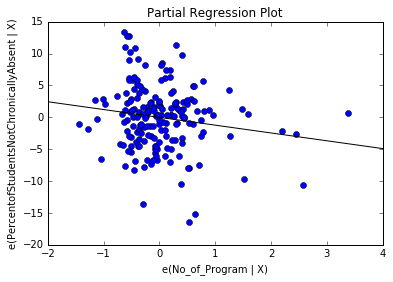

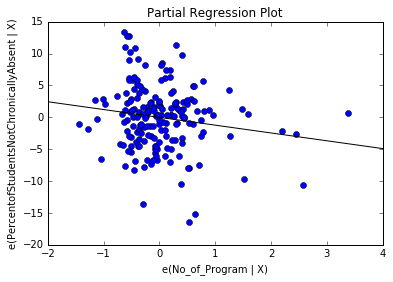

In [163]:
sm.graphics.plot_partregress("PercentofStudentsNotChronicallyAbsent", "No_of_Program", exog_others=["FrRedLnch_PercentEligible"], data=elementary, title_kwargs={}, obs_labels=False)

## These plots show a negative best fit line.  ??

# Analysis 4:  High Schools

In [164]:
#read csv.  This file contains the results of the SQL query defined by Anisa and Kyle
attendance = pd.read_csv('../data/QueryResultTable.csv')
#only select a subset of the available variables
attendance = attendance[['SchoolID','School','SchoolType','No_of_Program','FrRedLnch_PercentEligible','PercentofStudentsNotChronicallyAbsent','Enrollment']]

In [165]:
#We are only interested in high schools for this analysis
elementary = attendance.query("SchoolType == 'H'").drop_duplicates()
# remove records with missing data
elementary = elementary.dropna()
elementary

,SchoolID,School,SchoolType,No_of_Program,FrRedLnch_PercentEligible,PercentofStudentsNotChronicallyAbsent,Enrollment
11,4440,Academy of Arts and Academics,H,1,55.68,68.7,352.0
14,4540,Academy of International Studies (at Woodburn),H,1,76.95,71.1,308.0
41,1791,Al Kennedy Alternative High School,H,1,82.93,30.6,82.0
50,3950,Albany Options School,H,1,33.86,57.3,381.0
71,4507,Alliance High School,H,1,57.31,50.4,171.0
74,1186,Aloha High School,H,1,56.56,71.9,2058.0
83,17,Alsea High School,H,1,57.50,62.0,80.0
92,1210,Amity High School,H,1,45.02,69.8,291.0
122,323,Arlington Community Charter School,H,1,66.91,72.0,136.0
125,3247,Armadillo Technical Institute,H,1,52.69,38.0,93.0


## Plot:  Number of Programs (No_of_Program - xaxis) by PercentofStudentsNotChronicallyAbsent (yaxis)

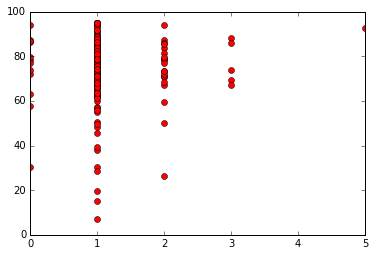

In [166]:
plt.plot(elementary['No_of_Program'], elementary['PercentofStudentsNotChronicallyAbsent'], 'ro')
plt.show()


### This shows that there is positive relationship between Number of programs and attendance (more programs means better attendance)

## Plot:  Poverty (FrRedLnch_PercentEligible - xaxis) by PercentofStudentsNotChronicallyAbsent

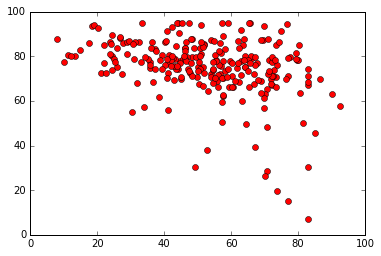

In [167]:
plt.plot(elementary['FrRedLnch_PercentEligible'], elementary['PercentofStudentsNotChronicallyAbsent'],'ro')
plt.show()


### This plot suggests a negative relationship between poverty and attendance (more poverty means more students chronically absent)

## Regression:  Predicting Absence with Povery and Number of Programs

In [168]:
res = ols("PercentofStudentsNotChronicallyAbsent ~ No_of_Program + FrRedLnch_PercentEligible", data=elementary).fit()
print(res.summary())


                                      OLS Regression Results                                     
Dep. Variable:     PercentofStudentsNotChronicallyAbsent   R-squared:                       0.126
Model:                                               OLS   Adj. R-squared:                  0.119
Method:                                    Least Squares   F-statistic:                     18.08
Date:                                   Fri, 20 May 2016   Prob (F-statistic):           4.64e-08
Time:                                           08:32:41   Log-Likelihood:                -998.39
No. Observations:                                    253   AIC:                             2003.
Df Residuals:                                        250   BIC:                             2013.
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                    

# Although the coeficients are both in the expected direction (poverty negatively predicts attendance, and num of programs positively predicts attendance), the num of programs relationship is not significant (P>|t| = 0.452)


## Plot of Number of Programs predicting with Poverty removed 

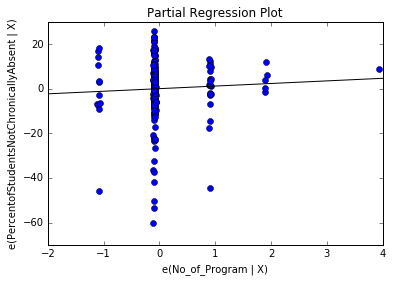

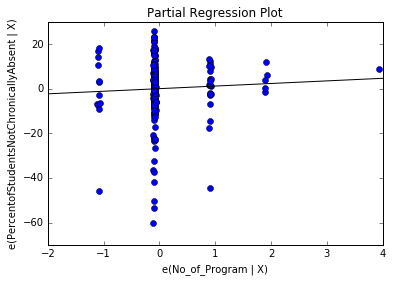

In [169]:
sm.graphics.plot_partregress("PercentofStudentsNotChronicallyAbsent", "No_of_Program", exog_others=["FrRedLnch_PercentEligible"], data=elementary, title_kwargs={}, obs_labels=False)

## These plots show a positive best fit line